# Introudtion 

In this project,we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
We will focus on data cleaning then we will answer below questions.
1,Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2,Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


# Dataset Preview
Below is a preview of a couple columns we'll work with from the dete_survey.csv:

ID: An id used to identify the participant of the survey
SeparationType: The reason why the person's employment ended
Cease Date: The year or month the person's employment ended
DETE Start Date: The year the person began employment with the DETE


Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

Record ID: An id used to identify the participant of the survey
Reason for ceasing employment: The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')
dete_survey.info()
tafe_survey.info()
#Many conlumns are not useful for answering the question.
#Columns will be dropped later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [2]:
dete_survey.head(2)
#We found 'Not Stated' in the Dete Start Date and Role Start Date column below, it means 'NaN'.
#Change to 'NaN' 

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [3]:
#To read Not Stated as Nan
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')
# Quick exploration of the data
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [4]:
#explore dete dataset
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
#Now we need to drop some columns 
col=dete_survey.columns[28:49]
dete_survey_updated=dete_survey.drop(col,axis=1)

In [6]:
#We also drop columns in tafe dataset
col=tafe_survey.columns[17:66]
tafe_survey_updated=tafe_survey.drop(col,axis=1)

In [7]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

Till this step, we dropped some columns that we dont need to use in both dataset.

# Rename columns
The Next is to pay attention to the column name in both dateset. We need to standarlize the column name because we need to combine 2 datasets.

We need below columns in both dataset.
dete_survey: ID,Separation Type,Cease Date,DETE Start Date,DETE Start Date,Age,Gender

Tafe_survey: Record ID,Reason for ceasing employment,CESSATION YEAR,LengthofServiceOverall.
Overall Length of Serviceat Institute (in years),current age,gender

In [8]:
dete_survey_updated.columns=dete_survey_updated.columns.str.replace(' ','_').str.lower().str.strip()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
tafe_survey_updated.columns=tafe_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()
tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none',
       'gender._what_is_your_gender?', 'currentage._current_age',
       'employment_type._employment_type', 'classification._classification',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'],
      dtype='obje

In [10]:
#Change column name in tafe data set
mapping = {'record_id': 'id', 'cessation_year': 'cease_date', 'reason_for_ceasing_employment': 'separationtype', 'gender._what_is_your_gender?': 'gender', 'currentage._current_age': 'age',
       'employment_type._employment_type': 'employment_status',
       'classification._classification': 'position',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)': 'institute_service',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check the specified column names were updated correctly
tafe_survey_updated.columns


Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Till this step, we have clened name of columns in both data set.

1,Make all the capitalization lowercase.
2,Remove any trailing whitespace from the end of the strings.
3,Replace spaces with underscores ('_').
4,Change column names

# Filter the Data
Then we keep removing columns that we dont need. The end goal is to answer the follwing question,

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [11]:
#Explore type of separationtype,we only need to focus on resignation type
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
#Now we only need to check rows with resignation type in both dataset and use them to do analysis
pattern=r'[R]esignation'
separationtype=dete_survey_updated['separationtype'].str.contains(pattern,na=False).copy()
dete_resignations=dete_survey_updated[separationtype]
dete_resignations.head(6)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [14]:
tafe_resignations=tafe_survey_updated.loc[tafe_survey_updated['separationtype']=='Resignation',:]
tafe_resignations.head(3)

,id,institute,workarea,cease_date,separationtype,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,...,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10


After extracting rows with resignation type, we can work on years.

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [15]:
dete_resignations['cease_date'].value_counts().sort_values()


07/2006      1
2010         1
07/2012      1
09/2010      1
05/2012      2
05/2013      2
08/2013      4
10/2013      6
11/2013      9
07/2013      9
09/2013     11
06/2013     14
12/2013     17
01/2014     22
2013        74
2012       126
Name: cease_date, dtype: int64

In [16]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [17]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

In [18]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [19]:
tafe_resignations['cease_date'].value_counts().sort_values()


2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

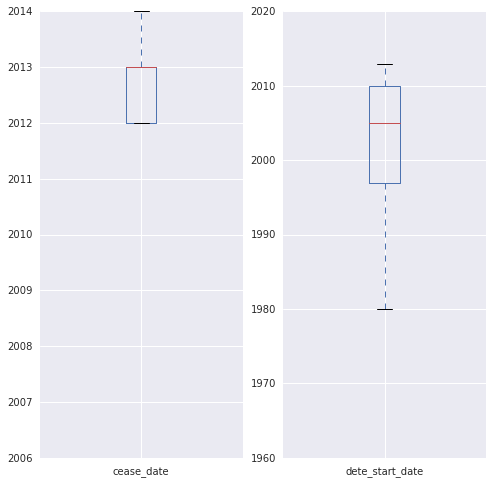

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))

fig.add_subplot(1,2,1)
ax1=dete_resignations.boxplot(column=['cease_date'])
ax1=plt.ticklabel_format(useOffset=False, axis='y')


fig.add_subplot(1,2,2)
ax2=dete_resignations.boxplot(column=['dete_start_date'])
ax2=plt.ticklabel_format(useOffset=False, axis='y')
plt.show()


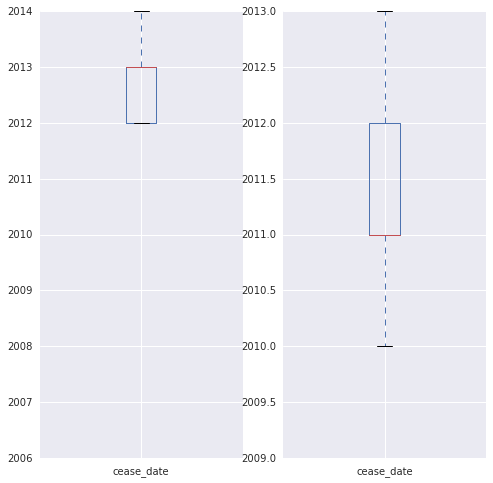

In [21]:
fig=plt.figure(figsize=(8,8))
fig.add_subplot(1,2,1)
ax1=dete_resignations.boxplot(column=['cease_date'])
ax1=plt.ticklabel_format(useOffset=False,axis='y')

fig.add_subplot(1,2,2)
ax1=tafe_resignations.boxplot(column=['cease_date'])
ax1=plt.ticklabel_format(useOffset=False,axis='y')
plt.show()


Our finding:
Columns 'cease_year' in both dataframe don't completely align. Dete dateset contains 2006 but tafe dataset does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

# Create a New Column
The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [22]:
#We calculate the period of each employee staied for. 
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations['institute_service'].head(5)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Identify Dissatisfied Employees
Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

1,tafe_survey_updated:
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction

2,detesurveyupdated:
job_dissatisfaction
dissatisfaction_with_the_department
physical_work_environment
lack_of_recognition
lack_of_job_security
work_location
employment_conditions
work_life_balance
workload

In [23]:
tafe_resignations['contributing_factors._dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing_factors._dissatisfaction, dtype: int64

In [24]:
tafe_resignations['contributing_factors._job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: contributing_factors._job_dissatisfaction, dtype: int64

In [25]:
#Write a function make values change
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
dete_col=['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload',]   
dete_resignations['dissatisfied']=dete_resignations[dete_col].applymap(update_vals).any(axis=1,skipna=False)

tafe_col=['contributing_factors._dissatisfaction','contributing_factors._job_dissatisfaction']  
tafe_resignations['dissatisfied']=tafe_resignations[tafe_col].applymap(update_vals).any(axis=1,skipna=False)
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

# Check the unique values after the updates
print(tafe_resignations_up['dissatisfied'].value_counts(dropna=False))
print(dete_resignations_up['dissatisfied'].value_counts(dropna=False))


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64
True    311
Name: dissatisfied, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New column called 'dissatisfied' is created in both data set indicating if an employee resigned because they were dissatisfied in some way. This columns only reutrn True,False,and NaN. 

# Combining dataset
To recap, we've accomplished the following:

Renamed our columns
Dropped any data not needed for our analysis
Verified the quality of our data
Created a new institute_service column
Cleaned the Contributing Factors columns
Created a new column indicating if an employee resigned because they were dissatisfied in some way
Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

In [26]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [27]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index=True)
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()


torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
job_dissatisfaction                                    311
lack_of_job_security                                   311
lack_of_recognition                                    311
maternity/family                                       311
relocation                                             311
physical_work_environment                              3

We still have to delete some columns that we dont use for later.
We need to drop any columns with less than 500 non null values.

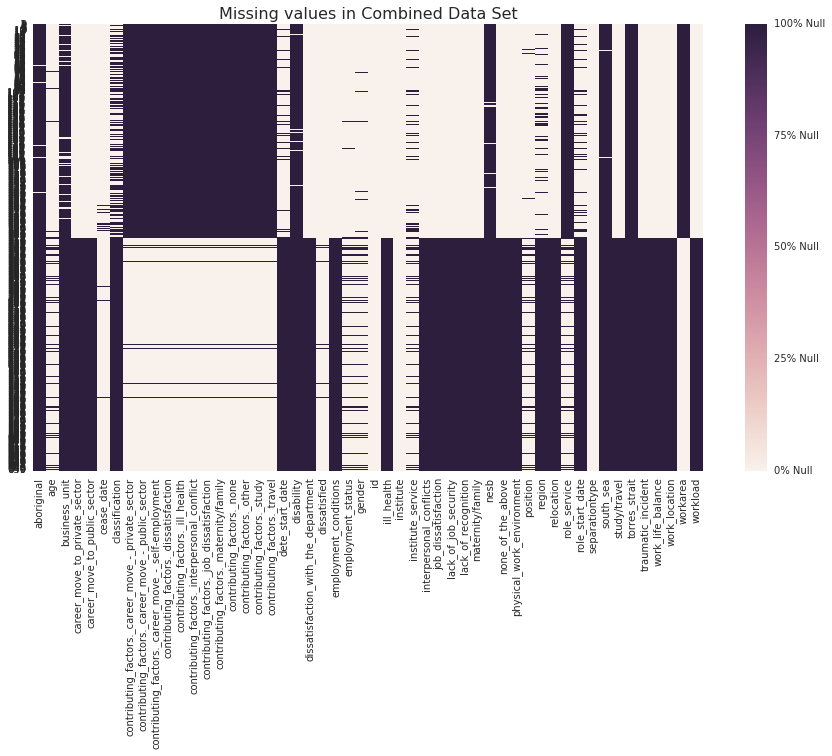

In [28]:
#Create a heatmap to see missing values in each column
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.heatmap(combined.isnull(), cbar=True)

#Format the chart
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,0.25,0.5,0.75, 1])
cbar.set_ticklabels(["0% Null","25% Null" ,"50% Null","75% Null","100% Null"])
ax.set_title('Missing values in Combined Data Set',fontsize=16)


In [29]:
#We are going to drop columns which have less than 500 not null unit.
combined_updated = combined.dropna(thresh = 500,axis=1).copy()
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

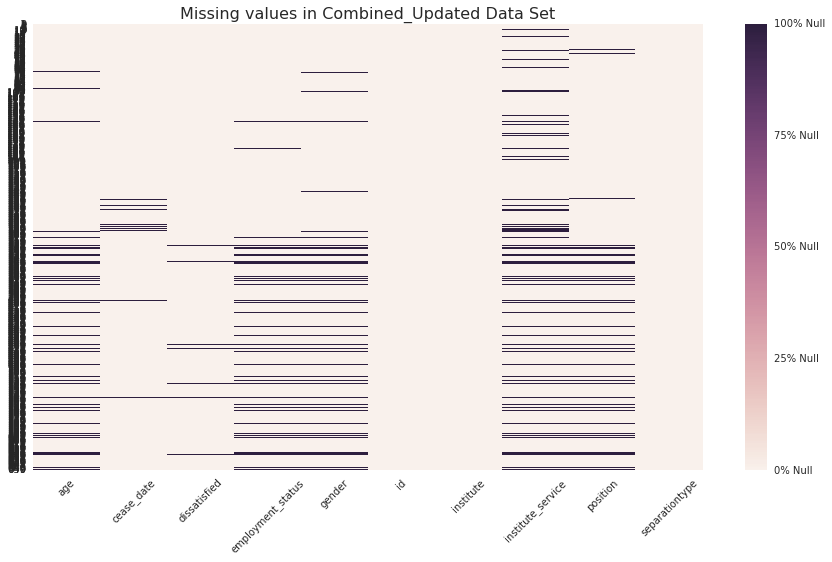

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.heatmap(combined_updated.isnull(),cbar=True)


cbar = ax.collections[0].colorbar
cbar.set_ticks([0,0.25,0.5,0.75, 1])
cbar.set_ticklabels(["0% Null","25% Null" ,"50% Null","75% Null","100% Null"])
ax.set_title('Missing values in Combined_Updated Data Set',fontsize=16)
plt.xticks(rotation=45)



# Clean the Service Column
Next, we'll clean the institute_service column and categorize employees according to the following definitions:

New: Less than 3 years in the workplace;
Experienced: 3-6 years in the workplace;
Established: 7-10 years in the workplace;
Veteran: 11 or more years in the workplace

In [31]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


In [32]:
#Extract the period of years and change to str type
combined_updated['institute_service_updated']=combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')
combined_updated['institute_service_updated']=combined_updated['institute_service_updated'].astype(float)
combined_updated['institute_service_updated'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_updated, dtype: int64

Break down institute_serivce_update column into various groups. 
New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

In [33]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_updated'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

# Perform Initial Analysis
After replacing the missing data in the dissatified column with the the most frequent values--False, we can do some initial analysis. The reason we do initial analysis is becasue we still have some missing values left to be done.


In [34]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
#Fill NaN with the most frequent value-False 
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
#check the change
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    249
Name: dissatisfied, dtype: int64

In [36]:
#Calculate percentage of employee who resginged due to dissatisfied in each group
resignation_per=combined_updated.pivot_table(index='service_cat',values='dissatisfied').reset_index()
print(resignation_per)

   service_cat  dissatisfied
0  Established      0.774194
1  Experienced      0.581395
2          New      0.476684
3      Veteran      0.808824


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



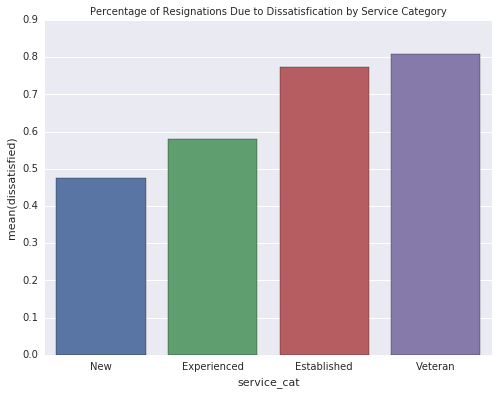

In [37]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
cat_order=['New', 'Experienced', 'Established', 'Veteran']
ax=sns.barplot(x='service_cat', y='dissatisfied', data=resignation_per, order=cat_order)

#Format the chart
ax.set_title('Percentage of Resignations Due to Dissatisfication by Service Category', fontsize=10)
sns.despine(top=True,bottom=True,right=True,left=True)


From above, we can see 80% of veteran employees resigned. It is the group has the highest resination rate. we can see how many employee resigned

In [38]:
#Creast a dataset onlu with 'True' from dissatified column only
dis_true=combined_updated[combined_updated['dissatisfied']==True]

#Distrubution of service_cat with resignation
emy_with_dis=dis_true.pivot_table(index='service_cat',values='dissatisfied',aggfunc=(sum)).reset_index()
print(emy_with_dis)

   service_cat  dissatisfied
0  Established          48.0
1  Experienced         100.0
2          New          92.0
3      Veteran         110.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



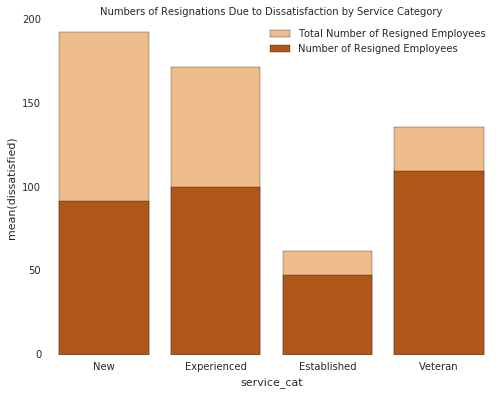

In [39]:
#Compare total number of resigned employees and the number of resigned employees due to dissatification
ttl_re = combined_updated.pivot_table(index='service_cat',values='dissatisfied', aggfunc=lambda x: len(x)).reset_index()
true_re = combined_updated.pivot_table(index='service_cat',values='dissatisfied', aggfunc=np.sum).reset_index()

#plot
fig,ax=plt.subplots(figsize=(8,6))
cat_order=['New', 'Experienced', 'Established', 'Veteran']
sns.set_style('white')
ax=sns.barplot(x='service_cat', y='dissatisfied', data=ttl_re, order=cat_order,color=(255/255,188/255,121/255),label='Total Number of Resigned Employees')
bottom_ax=sns.barplot(x='service_cat', y='dissatisfied', data=true_re, order=cat_order,color=(200/255,82/255,0/255),label='Number of Resigned Employees')

#Format the chart
ax.set_title('Numbers of Resignations Due to Dissatisfaction by Service Category', fontsize=10)
sns.despine(left=True, bottom=True,right=True,)
ax.legend(loc="upper right")



From above chart, we know that tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to keep working on the missing date to finalize this conclusion. 

# Further Analysis
1,How many people in each age group resgined due to some kind of dissatisfaction?

In [40]:
dis_true['age'].value_counts(dropna=False)

41-45            48
51-55            43
46-50            42
36-40            41
26-30            35
21-25            29
31-35            29
56-60            26
61 or older      23
NaN              19
41  45           12
46  50           12
21  25           10
36  40            9
26  30            8
31  35            7
56 or older       6
20 or younger     3
Name: age, dtype: int64

In [41]:
dis_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 641
Data columns (total 12 columns):
age                          383 non-null object
cease_date                   389 non-null float64
dissatisfied                 402 non-null bool
employment_status            384 non-null object
gender                       379 non-null object
id                           402 non-null float64
institute                    402 non-null object
institute_service            350 non-null object
position                     385 non-null object
separationtype               402 non-null object
institute_service_updated    350 non-null float64
service_cat                  350 non-null object
dtypes: bool(1), float64(3), object(8)
memory usage: 38.1+ KB


In [42]:
#clean age column
dis_true['age']=dis_true['age'].astype(str).str.replace('  ','/').str.replace(' ','/').str.replace('/','-').str.split('-').str[0]
dis_true['age']=dis_true['age'].astype(float)
dis_true['age'].value_counts(dropna=False).sort_values()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 20.0     3
NaN      19
 61.0    23
 56.0    32
 31.0    36
 21.0    39
 26.0    43
 51.0    43
 36.0    50
 46.0    54
 41.0    60
Name: age, dtype: int64

In [43]:
dis_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 641
Data columns (total 12 columns):
age                          383 non-null float64
cease_date                   389 non-null float64
dissatisfied                 402 non-null bool
employment_status            384 non-null object
gender                       379 non-null object
id                           402 non-null float64
institute                    402 non-null object
institute_service            350 non-null object
position                     385 non-null object
separationtype               402 non-null object
institute_service_updated    350 non-null float64
service_cat                  350 non-null object
dtypes: bool(1), float64(4), object(7)
memory usage: 38.1+ KB


In [44]:
def age_stage(col):
    if col>60:
        return 'over 60'
    elif 60 > col >= 50:
        return '50~60'
    elif 50 > col >= 40:
        return '40~50'
    elif 40 > col >= 30:
        return '30~40'
    elif pd.isnull(col):
        return np.nan
    else:
        return '20~30'
    
dis_true['age_stage']=dis_true['age'].apply(age_stage)

#check age_stage columns
dis_true_pt=dis_true.pivot_table(index='age_stage',values='dissatisfied',aggfunc=('sum'))
       

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [45]:
dis_true['age'].describe()

count    383.000000
mean      39.804178
std       11.773419
min       20.000000
25%       31.000000
50%       41.000000
75%       51.000000
max       61.000000
Name: age, dtype: float64

In [46]:
#Fill NaN with mean age 40.Also the age of 40 is in the age group that most of emplooyes fall in.
dis_true['age'].fillna(40,inplace=True)
dis_true['age'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



41.0    60
46.0    54
36.0    50
26.0    43
51.0    43
21.0    39
31.0    36
56.0    32
61.0    23
40.0    19
20.0     3
Name: age, dtype: int64

In [47]:
#Check the age_stage columns again and redo the pivota table
dis_true['age_stage']=dis_true['age'].apply(age_stage)
dis_true_pt=dis_true.pivot_table(index='age_stage',values='dissatisfied',aggfunc=(np.sum)).reset_index()
print(dis_true_pt)     

  age_stage  dissatisfied
0     20~30          85.0
1     30~40          86.0
2     40~50         133.0
3     50~60          75.0
4   over 60          23.0


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



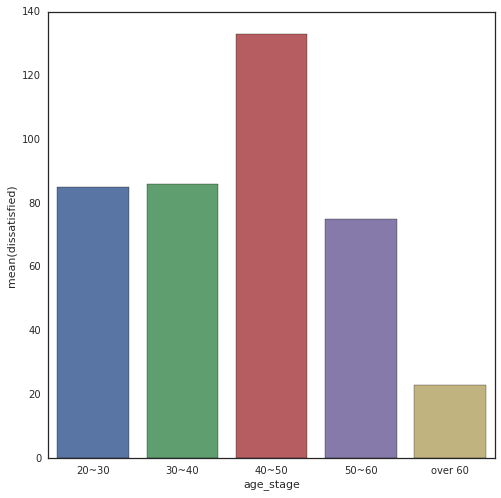

In [48]:
#plot
fig,ax=plt.subplots(figsize=(8,8))
sns.set_style('white')
ax=sns.barplot(x='age_stage',y='dissatisfied',data=dis_true_pt)

#Format 




From above analysis, we found that most of employees between the age of 40 and the age of 50 resigned due to dissatisfaction. The least employees over the age of 60 resigned due to dissatisfaction.

In [49]:
dis_true.groupby(['age_stage','separationtype'])['dissatisfied'].agg(sum).reset_index()

,age_stage,separationtype,dissatisfied
0,20~30,Resignation,20.0
1,20~30,Resignation-Move overseas/interstate,21.0
2,20~30,Resignation-Other employer,20.0
3,20~30,Resignation-Other reasons,24.0
4,30~40,Resignation,16.0
5,30~40,Resignation-Move overseas/interstate,19.0
6,30~40,Resignation-Other employer,22.0
7,30~40,Resignation-Other reasons,29.0
8,40~50,Resignation,38.0
9,40~50,Resignation-Move overseas/interstate,17.0


Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

From above analysis, we can't see the real reason of why young employees and old employees resigned, due to limited information of data.

# Conclusion 
In this project, we analyzed two exit surveys done by the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We found that employees who worked for the institutes for 7 years or more resigned due to dissatisfaction. On the contrary, employees employees who worked for the institutes for 3 years or less has the lowest resignations rate due to dissatisfication. As for what reasons led to resignations, we found most of younger employees resigned becasue of move overseas/interstate. Older employees resigned because of other reasons.

